In [2]:
import numpy as np
import pandas as pd

In [3]:
courses = pd.read_csv('Session20_dataset/courses.csv')
students = pd.read_csv('Session20_dataset/students.csv')
nov = pd.read_csv('Session20_dataset/reg-month1.csv')
dec = pd.read_csv('Session20_dataset/reg-month2.csv')
matches = pd.read_csv('Session20_dataset/matches.csv')
deliveries = pd.read_csv('Session20_dataset/deliveries.csv')

In [4]:
nov.head(2)

,student_id,course_id
0,23,1
1,15,5


In [5]:
dec.head(3)

,student_id,course_id
0,3,5
1,16,7
2,12,10


In [6]:
print(dec.shape)
print(nov.shape)

(28, 2)
(25, 2)


In [7]:
pd.concat([nov,dec])
regs = pd.concat([nov,dec], ignore_index=True)
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


## multiindex

In [8]:
multi = pd.concat([nov,dec],keys=['Nov','Dec'])

In [9]:
multi.loc['Nov']          # get the nov data
multi.loc[('Nov', 1)]     # to get the specific row from nov

student_id    15
course_id      5
Name: (Nov, 1), dtype: int64

### concat(axis=1)

In [10]:
pd.concat([nov, dec], axis=1)

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


# merge()
### inner join

In [11]:
students

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


In [12]:
# pd.merge([regs,students],how='inner')
students.merge(regs, how='inner',on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


## how='left'

In [13]:
courses.merge(regs, on=['course_id'], how='left')

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


# merge(how = 'right') 

In [14]:
students.merge(regs, on='student_id', how = 'right')

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


## how='outer'

In [15]:
students.merge(regs, on='student_id', how='outer')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23.0,1.0
1,1,Kailash Harjo,23.0,6.0
2,1,Kailash Harjo,23.0,10.0
3,1,Kailash Harjo,23.0,9.0
4,2,Esha Butala,1.0,5.0
5,3,Parveen Bhalla,3.0,3.0
6,3,Parveen Bhalla,3.0,5.0
7,4,Marlo Dugal,14.0,NaN
8,5,Kusum Bahri,6.0,NaN
9,6,Lakshmi Contractor,10.0,NaN


### 1. find total revenue generated

In [16]:
revenue = regs.merge(courses, on='course_id', how='inner')['price'].sum()
print(revenue)

154247


### 2. find month by month revenue

In [31]:
temp_df = pd.concat([nov,dec], keys=['Nov','Dec']).reset_index()
temp_df.merge(courses, on='course_id').groupby('level_0')['price'].sum().reset_index()

,level_0,price
0,Dec,65072
1,Nov,89175


### 3. Print the registration table
##### cols -> name -> course -> price

In [53]:
temp_df=regs.merge(students, on='student_id')
temp_df.merge(courses, on= 'course_id', how='inner')[['name','course_name','price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,tableau,2499
2,Fardeen Mahabir,power bi,1899
3,Chhavi Lachman,machine learning,9999
4,Elias Dodiya,plotly,699
5,Fardeen Mahabir,python,2499
6,Kailash Harjo,python,2499
7,Tarun Thaker,pandas,1099
8,Yash Sethi,data analysis,4999
9,Preet Sha,python,2499


### 4. Plot bar chart for revenue/course

<Axes: xlabel='course_id'>

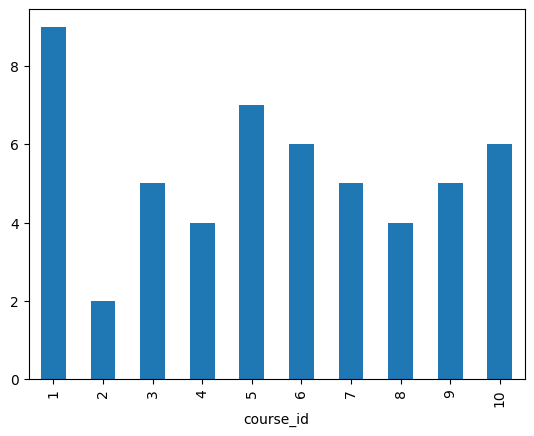

In [62]:
regs.groupby('course_id')['course_id'].value_counts().plot(kind='bar')

<Axes: xlabel='course_name'>

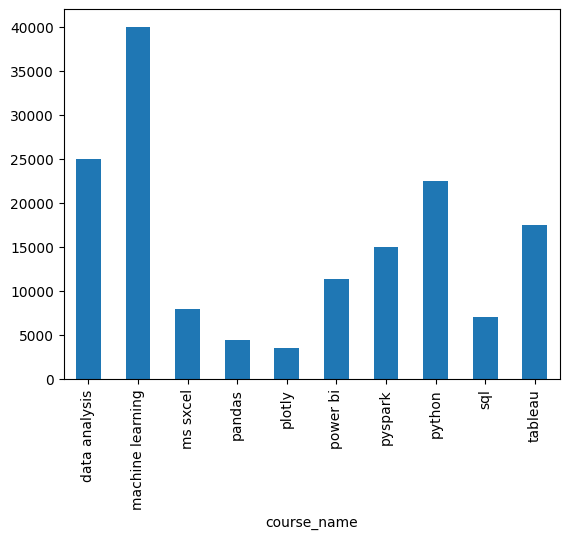

In [63]:
regs.merge(courses, on='course_id', how='inner').groupby('course_name')['price'].sum().plot(kind='bar')

### 5. find students who enrolled in both the months

In [75]:
pd.DataFrame(nov.merge(dec, on='student_id', how='inner').merge(students)['name'].unique(),columns=['Name'])

,Name
0,Chhavi Lachman
1,Fardeen Mahabir
2,Elias Dodiya
3,Kailash Harjo
4,Tarun Thaker
5,Yash Sethi
6,David Mukhopadhyay
7,Yasmin Palan
8,Parveen Bhalla


In [78]:
common_students = np.intersect1d(nov['student_id'],dec['student_id'])
common_students

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23])

In [83]:
students[students['student_id'].isin(common_students)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


### 6. find course that got no enrollment
#### courses['course_id']
#### regs['course_id']

In [91]:
#courses['course_id']
c_id_lst = np.setdiff1d(courses['course_id'],regs['course_id'])
c_id_lst

array([11, 12])

In [93]:
courses[courses['course_id'].isin(c_id_lst)]   # this are the courses which are not registered

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


### 7. find students who did not enroll into any courses

In [95]:
std_lst = np.setdiff1d(students['student_id'], regs['student_id'])
std_lst

array([ 4,  5,  6,  8,  9, 10, 20])

In [97]:
students[students['student_id'].isin(std_lst)]

,student_id,name,partner
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8
19,20,Hanuman Hegde,11


### 8. Print student name -> partner name for all enrolled students
## self join

In [102]:
students.merge(students, how='inner', left_on='partner',right_on='student_id')
students.merge(students, how='inner', left_on='partner',right_on='student_id')[['name_x','name_y']]

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor
5,Lakshmi Contractor,Aayushman Sant
6,Tarun Thaker,Nitika Chatterjee
7,Radheshyam Dey,Kusum Bahri
8,Nitika Chatterjee,Marlo Dugal
9,Aayushman Sant,Radheshyam Dey


### 9. find top 3 students who did most number enrollments

In [113]:
# students.merge(regs, on='student_id', how= 'inner')['name'].value_counts()  this ma wrong approch as name may same of tow different students
students.merge(regs, on='student_id', how= 'inner').groupby(['name','student_id'])['name'].value_counts().sort_values(ascending=False).head(3)

name            student_id
Chhavi Lachman  23            6
Tarun Thaker    7             5
Radha Dutt      12            4
Name: count, dtype: int64

### 10. find top 3 students who spent most amount of money on courses

In [120]:
students.merge(regs, on='student_id', how='inner').merge(courses, on='course_id', how='inner').groupby(['name','student_id'])['price'].sum().sort_values(ascending=False).head(3) 

name              student_id
Chhavi Lachman    23            22594
Pranab Natarajan  14            15096
Qabeel Raman      19            13498
Name: price, dtype: int64

# IPL Problems
## find top 3 studiums with highest sixes/match ratio


In [123]:
temp_df=deliveries.merge(matches,left_on='match_id', right_on='id')

In [127]:
six_df = temp_df[temp_df['batsman_runs']==6]

In [139]:
num_sixes = six_df.groupby('venue')['venue'].count()

In [138]:
num_matches = matches['venue'].value_counts()

In [146]:
(num_sixes/num_matches).sort_values(ascending=False).head(3)

venue
Holkar Cricket Stadium     17.600000
M Chinnaswamy Stadium      13.227273
Sharjah Cricket Stadium    12.666667
dtype: float64

### find orange cap holder of all the seasons

In [177]:
temp_df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False).drop_duplicates(subset=['season'],keep='first').sort_values('season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641
